本文将介绍 Jupyter Notebook 的基础使用，包括如何在 Python 与 R 间数据交互。

<!-- more -->

# Jupyter Notebook 基础

本文件使用 Python 3 内核。

## 安装与启动

### 安装

安装 Jupyter Notebook 是很简单的。如果你安装了 Annoconda 套件，那么它已经被安装好。

使用以下的 CMD 命令进行安装，其中 pip3 与 pip 应该是通用的（如果 pip 已升级到最新，则第一行可忽略）：
```
pip3 install --upgrade pip
pip3 install jupyter
```

### 启动

要启动 Jupyter Notebook，进入一个文件夹（建议选一个空文件夹），按住 Shift 单击鼠标右键，选择“在此处打开命令行窗口”，输入：
```
jupyter notebook
```

稍等片刻，你的默认网页浏览器会打开，Jupyter Notebook 的主页 HOME 会显示出来。HOME 页面会显示启动时选择的文件夹内的文件。

**注意：此时会自动打开一个控制台窗口，请不要关闭它。**

### 快捷启动：注册表修改

将以下数行保存为一个后缀名为 .reg 的文件，然后用管理员权限运行之：
```cmd
Windows Registry Editor Version 5.00

[HKEY_CLASSES_ROOT\Directory\Background\shell\cmd_jupyter]
@="在此处打开 Jupyter Notebook"
"Extended"=""

[HKEY_CLASSES_ROOT\Directory\Background\shell\cmd_jupyter\command]
@="cmd.exe /s /k \"jupyter notebook\""

```

其中，"Extended" 是可选的一行，如果添加该行，只在按住 Shift 时，右键才会显示“在此处打开 Jupyter Notebook”；不按 Shift 时，右键菜单中不会显示该内容。

完成了上述注册表的导入后，你就可以通过“打开文件夹 -> Shift + 右键空白处 -> 在此处打开 Jupyter Notebook”的方法来启动 Jupyter 了。

## 操作

### 新建与关闭

通过上述的方法安装后，Jupyter Notebook 的默认内核是 Python。在 Home 页面，右上角的 New 下拉菜单中，应当有 Python 选项。点击它以新建一个 ipynb 文件，其内核被指定为 Python。在新窗口中，你可以：

- 重命名：左上方的 Jupyter 图标的右侧，即可重命名文件。
- 保存：Ctrl + S 快捷键，或工具栏左起第一个保存图标。
- 关闭：**不建议直接关闭选项卡**，建议使用菜单栏 File -> Close and Halt. 

### 导出

对于不使用 Jupyter Notebook 的读者，你可以使用 File -> Download as -> HTML 来完成导出工作。

需要指出的是，自动转为 pdf 的效果难以令人满意（如果有兴趣折腾，可以参考：[此文](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook)）。HTML 应该是除 ipynb 外，最佳的导出格式。

### 元胞与操作模式

Jupyter Notebook 以元胞（cell）为基本运行单位。元胞的类型可以通过工具栏的“Markdown / Code”下拉菜单进行更改。

操作模式分为两种，通过 Esc 键或者鼠标单击（元胞外侧空白 / 元胞内部）来切换：
- 输入模式：当前选中元胞的框线为绿色。键盘会输入内容到元胞内。
- 管理模式：当前选中元胞的框线为蓝色。键盘会执行一些元胞级的操作，比如删除元胞。

输入模式常用的快捷键：
- Ctrl Enter：执行当前元胞。如果是 Markdown，则展现预览；如果是 Code，则运行并输出结果。
- Alt Enter：执行当前元胞，并在其下方插入一个新元胞。
- Shift Enter：执行当前元胞，并选中其下方的已有元胞。
- Ctrl Shift -：分割元胞。

管理模式常用的快捷键：
- 方向键：移动光标以选择不同元胞。
- Shift 上/下：多选元胞。
- Shift M：合并选择的元胞；如果单选，向下合并。
- Y：将选中元胞转换为 Code 类型。
- M：将选中元胞转换为 Markdown 类型。
- A / B：在上方/下方插入元胞。
- X：剪切元胞。实际上常用于删除元胞。
- D, D：删除元胞。
- Z：撤销。
- I：中断内核。
- (Shift) Space：向（上）下滚动页面。
- (Shift) L：在输入模式时，显示（所有）元胞的行号。

完整的快捷键列表，参考 Help -> Keyboard Shortcuts.（或在管理模式下按 H） 

### 运行代码

在整个文档编写完毕后，一般需要到 Kernel-> Restart and Run All 来重启内核并顺序执行元胞。

此举动会重置代码元胞左侧的 In[] 与 Out[] 的编号。

## 内核的添加与指定

如果要添加别的内核呢？此处只以 R 为例。你也可以参考：[IRkernel 官网](https://irkernel.github.io/installation/)。

首先，请确认 **R 安装路径位于 Windows 系统的环境变量中**。然后，在 R 的控制台中输入：

```R
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
devtools::install_github('IRkernel/IRkernel')
IRkernel::installspec()
```

关闭后重新打开 Jupyter Notebook，在 Home 页的右上，New 下拉菜单应有 R 选项。

注意：**一个 ipynb 文件只能有一个内核，在创建时已指定**。

## 魔法命令

一般以百分号开头。有两种：
- 以单百分号（%）开头，作用于本行。
- 以双百分号（%%）开头，作用于本元胞。

### 使用其他编程语言

在元胞首行使用 `%%` 加上编程语言名称即可。默认支持的有：HTML, bash, python2, python3, perl, ruby.

In [1]:
%%HTML
<div>A text</div>

如果安装了 R 内核，用 `%%R` 的方式也可以在 Python 的 ipynb 文件中调用 R。更多关于 R 与 Python 的共用，建议使用 rpy2，参考本文末节。

值得一提的是，Python 的 Cython 库也支持以类似的方式使用。

### run

通过 `%run` 命令，能够执行 py 文件，或者 ipynb 文件。

In [2]:
# %run ./R-clustering.ipynb

### load / load_ext

从外部加载脚本或插件。

### who

显示所有全局变量；也可以指定要显示的变量的类型。

In [3]:
%who list

No variables match your requested type.


### time

计时工具。用 `%%time` 显示**当前元胞**的运行耗时：

In [4]:
%%time
a = [x for x in range(10000000)]

Wall time: 704 ms


`%%timeit` 会默认运行**该行**代码十万次，并返回统计结果。

In [5]:
%timeit a = [x for x in range(100)]

4 µs ± 12.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 其他实用技巧

### 多行编辑

按住 Alt 拖动鼠标，选中多行。再按方向键，可以同时调整多行光标。

### 禁止输出结果

在行尾加上分号即可。

### 快速获取帮助

在 Help 菜单，能够找到一些常用库的网页链接，比如 Numpy。

在一个方法前加上问号，来获得它的帮助：

In [6]:
?sum()

按 Esc 或者 Q 以退出弹出的帮助 pager。

### 使用 LaTeX 

利用双美元符即可：

```
$$ \sin\alpha = \cos\beta $$
```

$$ \sin\alpha = \cos\beta $$

### 使用命令行

行首以叹号开头即可。

In [7]:
!cd

E:\Programming\wklchris.github.io\ipynb


## 配置文件

Jupyter 是可以用配置文件（以 .py 结尾）修改的方法来调节内容参数的。Windows 下默认的配置文件位于：

```cmd
C:\Users\User-Name\.jupyter
```
如果你没有上述的配置文件，使用命令行命令：

```cmd
jupyter notebook --generate-config
```

来创建一个。关于 Ipython 的配置文件，你可以使用：

```cmd
ipython profile create
```

来创建。我们常常把 `InteractiveShell.ast_node_interactivity` 项改为 'all' 来显示每个 cell 中的输出（而不是只显示最后一行）。例如：

In [8]:
a, b = 1,2
a
b

1

2

实质上是改动了 ipython_config.py 这个文件，在文件首加上了两行内容：

```python
c = get_config()
c.InteractiveShell.ast_node_interactivity = 'all'
```

## Python 与 R 共事：rpy2

确认你安装了 rpy2 这个 Python 库。Windows 用户可能需要一些 PATH 环境变量配置。右键我的电脑，属性；左侧选择高级系统设置，“高级”选项卡，右下角环境变量。然后：
- 用户变量：上方的用户变量对话框中，将 R.dll 所在的路径加入 Path 变量。对于 64 位系统，形如：E:\R-3.3.2\bin\x64。
- 系统变量：下方的系统变量对话框中，新建两个新的变量：
    - `R_HOME`：形如 E:\R-3.3.2
    - `R_USER`：形如 E:\Python\Lib\site-packages\rpy2。如果你还使用 Rstudio，加上其路径：形如 E:\RStudio\bin。

之后使用：

In [9]:
%load_ext rpy2.ipython

然后，你会发现，即使用 numpy / pandas 创建的对象，其值也能够传入到 R 内核进行调用。原生的 list 对象当然也支持。

In [10]:
import numpy as np
import pandas as pd

x = np.linspace(0, 4, 100)
df = pd.DataFrame({"X": x, "Y": x ** 1.5})
a = list(range(5))
b = list(range(1, 6))

正如上文魔法命令所提到的，使用 `%%R` 来使用 R 语言。使用参数 `-i` 从 Python 载入变量，使用参数 `-o` 来从 R 返回变量给 Python。变量间以逗号分隔。

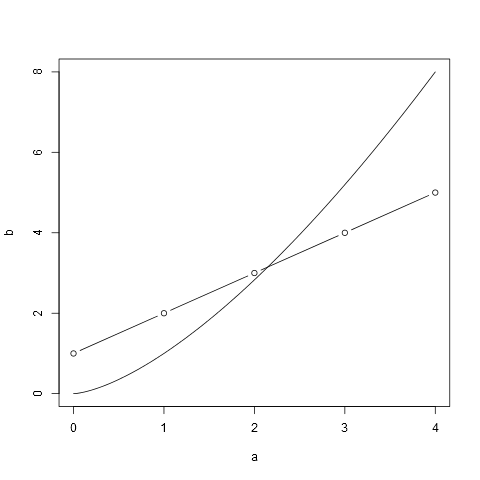

In [11]:
%%R -i a,b,df -o c
plot(a, b, "b", ylim=c(0, 8))
lines(df$X, df$Y)
c = a + b

变量 c 的值由上述代码返回：

In [12]:
c

array([1, 3, 5, 7, 9], dtype=int32)